<a href="https://colab.research.google.com/github/andrea0026/Satisfacci-n-de-los-clientes/blob/main/simulacro_de_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos de aerolinea, tarea:

1. Una segmentación de los clientes en grupos y describir esos grupos, qué tienen en común y en qué se diferencian.

2. Un modelado de datos para ver si la satisfacción general de los clientes se puede predecir por la información de sus vuelos y las respuestas a la entrevista, además de la satisfacción general.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, plot_confusion_matrix
from IPython.core.pylabtools import figsize

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/archivos/flight_df - flight_df.csv')
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


Instrucciones de agrupamiento:

1. Carga los datos.

2. Explora los datos.

In [ ]:
df['satisfied'].value_counts()

0    11339
1     8661
Name: satisfied, dtype: int64

In [ ]:
#validación de columnas o características
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [ ]:
#validar si existen columnas duplicadas
df.duplicated().any()

False

In [ ]:
#Resumen estadistico
df.describe().round(2)

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,...,20000.00,20000.00,20000.00,20000.00,20000.00,20000.0,20000.00,20000.00,20000.00,20000.00
mean,39.48,2.03,1188.55,2.73,3.06,2.75,2.97,3.20,3.26,3.44,...,3.62,3.30,3.64,3.28,14.32,14.7,0.49,0.82,0.69,0.43
std,15.11,0.96,1001.14,1.33,1.53,1.40,1.28,1.33,1.35,1.32,...,1.19,1.26,1.18,1.31,36.45,36.9,0.50,0.39,0.46,0.50
min,7.00,1.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,27.00,1.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,3.00,3.00,3.00,2.00,0.00,0.0,0.00,1.00,0.00,0.00
50%,40.00,2.00,842.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,...,4.00,3.00,4.00,3.00,0.00,0.0,0.00,1.00,1.00,0.00
75%,51.00,3.00,1733.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,...,5.00,4.00,5.00,4.00,12.00,13.0,1.00,1.00,1.00,1.00
max,85.00,3.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,1305.00,1280.0,1.00,1.00,1.00,1.00


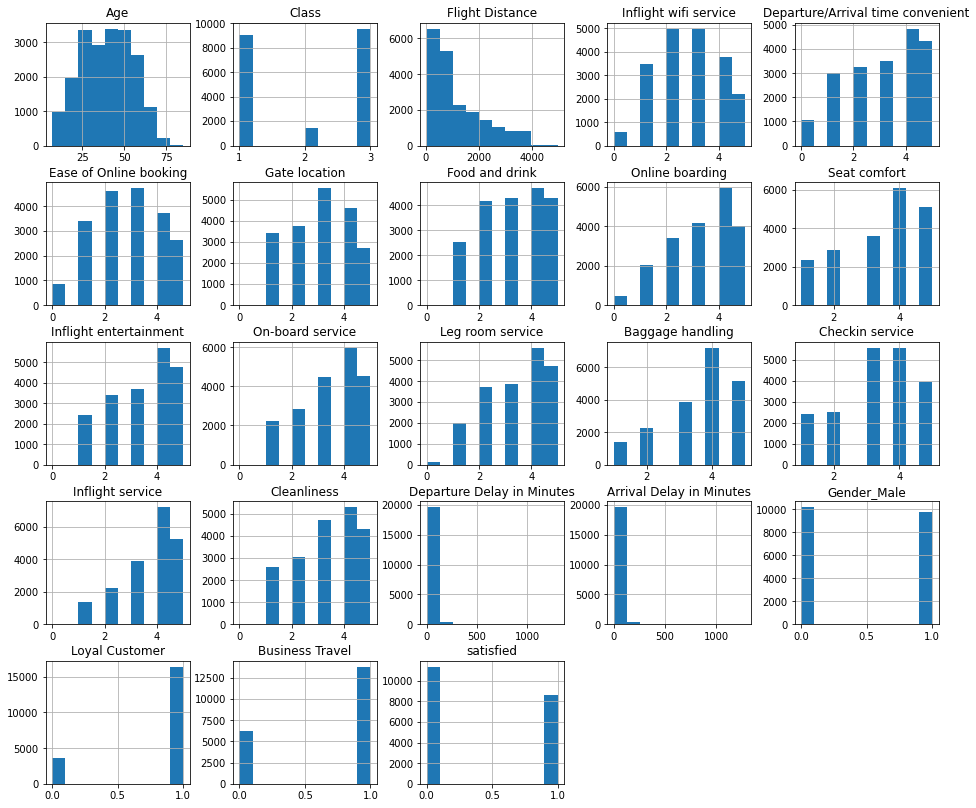

In [ ]:
#por el resumen anterior, parece que los tiempos de retraso de salida y de arrivo presentan valores atipicos
#grafico de histograma para todas las caracteristicas

df.hist(figsize=(16,14));

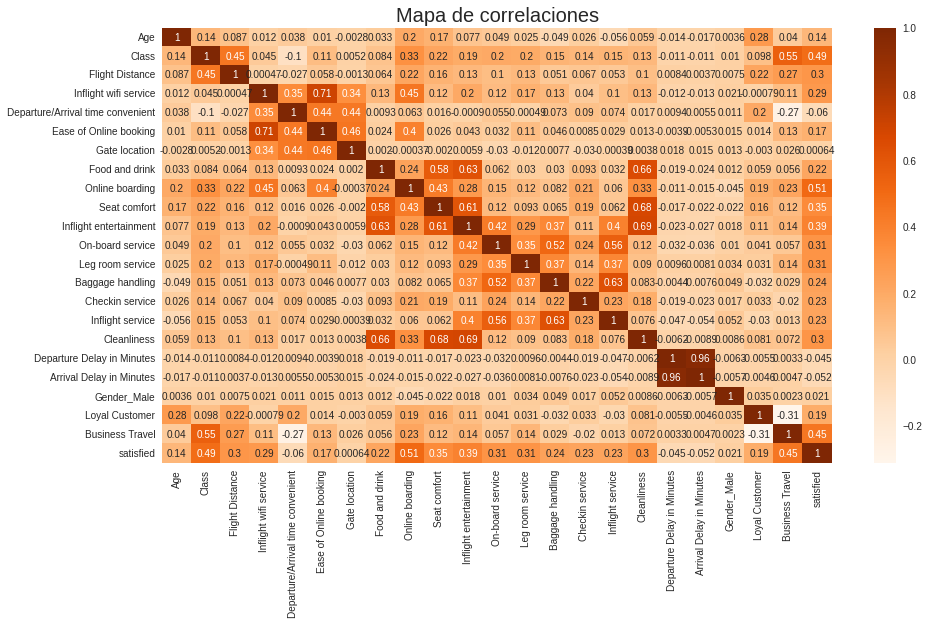

In [ ]:
# mapa de calor para identificar correlaciones 

plt.figure(figsize = (15,8))
correlations = df.corr();
sns.heatmap(correlations, cmap='Oranges' , annot=True);
plt.title('Mapa de correlaciones', fontdict={'fontsize': 20});

3. Prepara los datos para el modelado.

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,-0.892030,1.009522,0.872482,-0.548629,-0.036640,0.178198,0.022391,-0.902241,-0.930920,-1.087425,...,-0.525486,-0.240529,-0.536788,-0.977853,-0.392812,-0.398338,-0.981472,0.47193,0.673572,-0.873970
1,0.828853,1.009522,-0.507983,1.712360,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,0.317111,0.553689,0.307816,0.546885,0.101003,-0.344136,-0.981472,0.47193,0.673572,1.144204
2,-0.759654,-1.067256,-0.999437,0.205034,1.269614,0.178198,0.803920,-0.151687,-0.189328,-0.331797,...,0.317111,0.553689,1.152419,-0.215484,-0.392812,-0.398338,1.018878,0.47193,-1.484622,-0.873970
3,0.961229,1.009522,-0.734731,0.205034,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,-0.525486,0.553689,-0.536788,-1.740222,2.103696,1.769746,-0.981472,0.47193,0.673572,-0.873970
4,0.034600,-1.067256,-0.413089,0.958697,-0.036640,0.178198,0.022391,0.598867,0.552263,0.423832,...,-0.525486,-0.240529,-0.536788,0.546885,-0.392812,-0.398338,1.018878,0.47193,0.673572,-0.873970


4. Utiliza un modelo k-medias para agrupar a los estudiantes en un número óptimo de clústeres. 

Utiliza un trazado de codo y una puntuación de silueta para encontrar el número óptimo de clústeres.

Debe haber entre 2 y 10 clústeres.

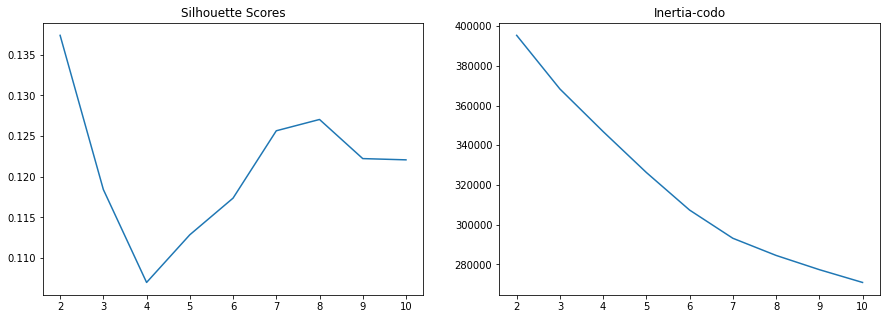

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia-codo')
axes[1].set_xticks(ks);

Dado el gráfico de puntuación de silueta los datos se agrupan en 2 clusters, 8 clusters tambien presentan un puntaje alto. El grafico del codo no muestra claramente una división de grrupos.

5. Analiza e informa sobre los clústeres.

  Describe cada clúster.

  ¿En qué se diferencian los clústeres?

  Crea 2 visualizaciones explicativas de calidad del informe que muestren las diferencias importantes entre los clústeres.
  
  Interpreta y explica cada visualización.

In [ ]:
# Modelo KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
#Agregue los clústeres como una columna en el marco de datos
df['cluster'] = kmeans.labels_

In [ ]:
# Analizar dataframe por cluster y agregados por el promedio
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,37.205982,1.599413,908.847142,2.302505,3.013304,2.452610,2.936783,2.719699,2.576750,...,3.230755,2.975961,3.247362,2.69878,15.754014,16.373888,0.477291,0.756583,0.533535,0.105514
1,1,42.197231,2.540820,1523.506757,3.237446,3.107351,3.108559,3.012746,3.779804,4.067905,...,4.094165,3.694319,4.100429,3.98187,12.599055,12.691572,0.506648,0.891221,0.872761,0.825294


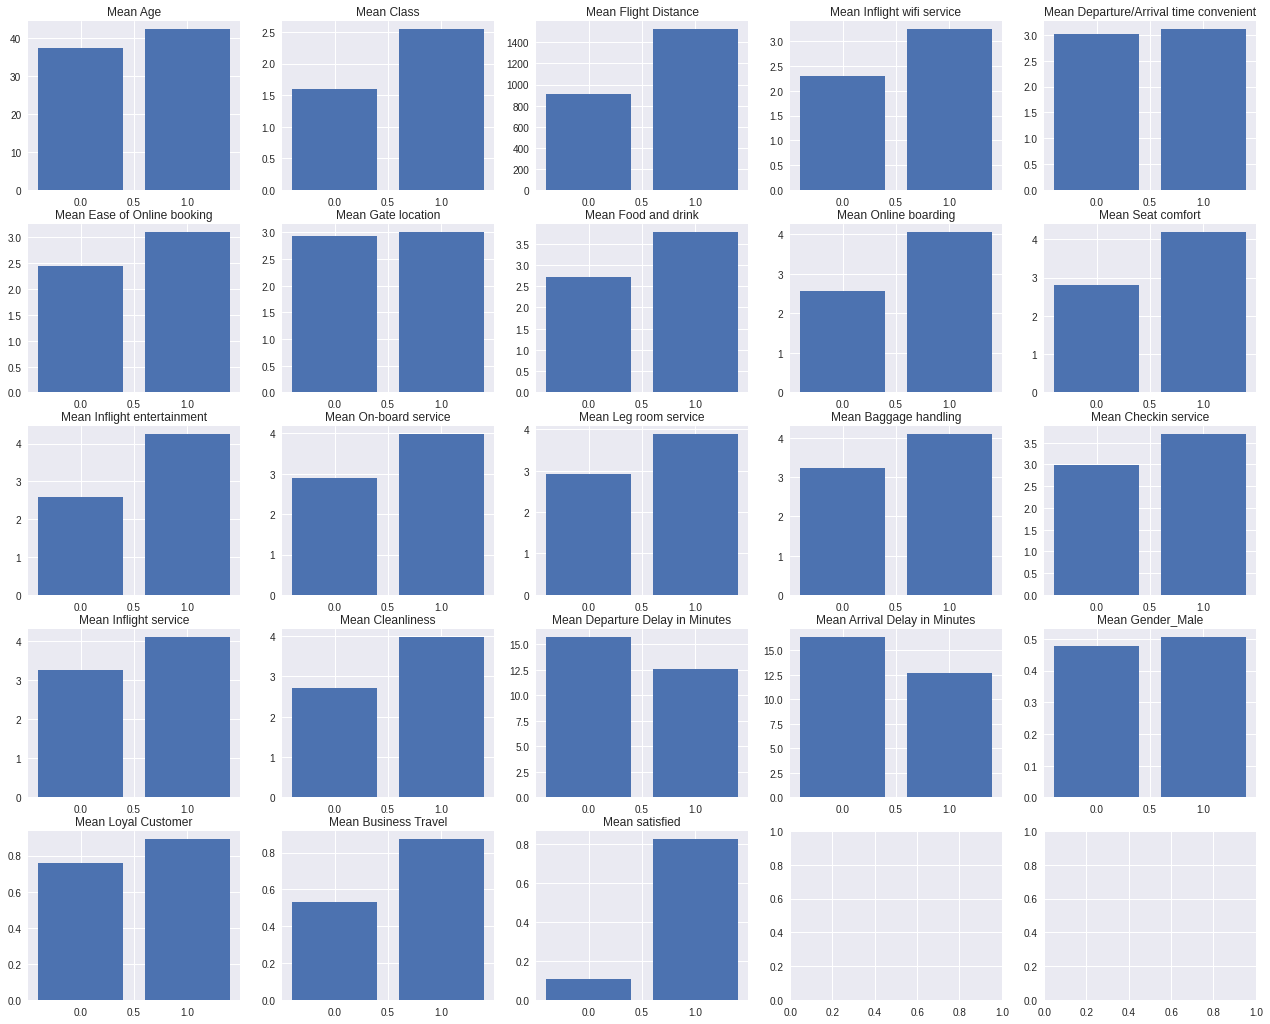

In [ ]:
# Visualize means 
fig, axes = plt.subplots(5,5, figsize = (22, 18))
# fig is an array of dimensions 5,5.  axes.ravel() will flatten 
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

En general hay diferencia entre los grupos, podemos que una baja calificación en los aspectos evaluados de 0 a 5, influyen en un bajo nivel de satisfacción. Tambien se puede ver que las personas de menos edad son las mas insatisfechas y las que peor calificación otorgan en los diferentes servicios. 

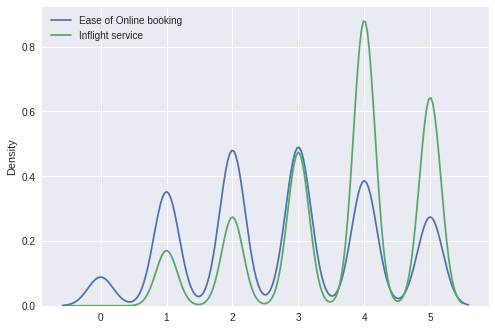

In [ ]:
plt.style.use('seaborn')
sns.kdeplot(df['Ease of Online booking']);
sns.kdeplot(df['Inflight service']);
plt.xlabel('')
plt.legend(labels=['Ease of Online booking','Inflight service']);

#realice este gráfico ya que en el mapa de calor se ve uan correlacion entre estas 2 variables.

## Instrucciones de modelado: 

A la aerolínea también le gustaría saber si la satisfacción general se puede predecir bien a partir de la información de los pasajeros y la satisfacción con partes específicas de su experiencia. Tu objetivo será la columna “satisfied”.

1. Utiliza random_state = 42 para tu train_test_split.

2. Aplica ACP para reducir el número de características a un número más razonable.

  Indica cuántas columnas menos hay después del ACP.

  Indica la cantidad de varianzas retenidas después del ACP.

3. No filtres los datos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/archivos/flight_df - flight_df.csv')
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [ ]:
X = df.drop(columns = 'satisfied')
y = df['satisfied']

In [ ]:
X.shape

(20000, 22)

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)


In [ ]:
# Inicializar y entrenar con PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

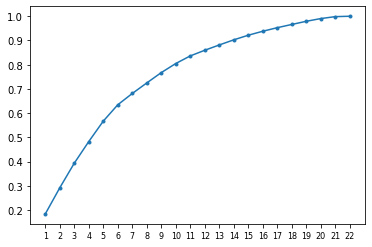

In [ ]:
# Grafique la suma acumulada del porcentaje de varianza explicada para cada componente y los anteriores.
plt.plot(range(1, 23), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,23), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

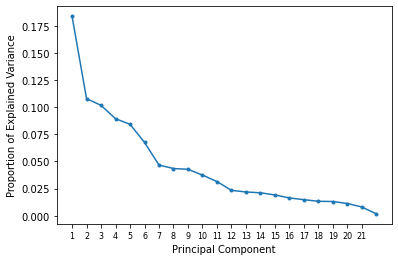

In [ ]:
# Plot the explained variance ratios of the first 22 principal components
plt.plot(range(1, 23), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 22), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

el grafico muestra que el primer componente explica la proporción más grande de la varianza, y cada componente adicional contribuye cada vez menos, por lo que 12 columnas serian suficientes para entrenar el modelo.

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=12))

In [ ]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=12))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
#evaluar el modelo
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.8572
Testing accuracy: 0.8596


Pasamos de 22 características a solo 12 y seguimos teniendo una precisión de las pruebas de alrededor del 86 % en nuestros datos de prueba.

# 4. Utiliza un modelo de aprendizaje profundo para predecir si los clientes informarán que estuvieron satisfechos.

* Crea 3 versiones diferentes de un modelo secuencial.

Cada modelo nuevo debe ser una iteración en el modelo anterior.

Justifica por escrito por qué cambiaste lo que hiciste para cada modelo.

Por ejemplo, por qué agregaste capas, regularización, nodos, etc.

* Utiliza alguna forma de regularización con al menos un modelo.
* Evalúa cada modelo con las métricas adecuadas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/archivos/flight_df - flight_df.csv')
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [ ]:
# Drop missings
df.dropna(inplace = True)
X = df.drop(columns = 'satisfied')
y = df['satisfied']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

22

In [ ]:
# Without dropout
# Sequential model
model = Sequential()
# primer capa oculta
model.add(Dense(22, # numero de neuronas
                input_dim = input_shape, 
                activation = 'relu'))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

NameError: ignored

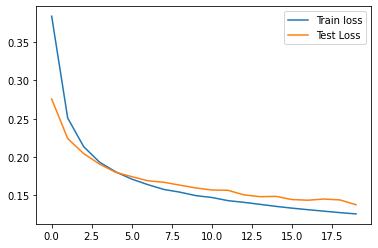

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
#en esta segunda version aumentaré el número de epocas (50) y agregaré una capa (3), para ver su comportamiento
# Without dropout
# Sequential model
model = Sequential()
# primer capa oculta
model.add(Dense(22, # numero de neuronas
                input_dim = input_shape, 
                activation = 'relu'))
model.add(Dense(15, 
                activation = 'relu'))
model.add(Dense(5, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3685 - val_loss: 0.2729
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2381 - val_loss: 0.2155
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1949 - val_loss: 0.1881
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1746 - val_loss: 0.1787
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1645 - val_loss: 0.1655
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1576 - val_loss: 0.1621
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1533 - val_loss: 0.1626
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1483 - val_loss: 0.1581
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1461 - val_loss: 0.1578
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1428 - val_loss: 0.1573

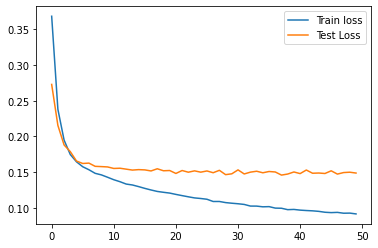

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

vemos que con 50 epocas y 3 capas el comportamiento mejoró solo para los datos de entrenamiento y no para los de prueba.

A continuacion aplicaré regularizacion dropout

In [ ]:
# Con dropout
# Sequential model
model = Sequential()
# primer capa oculta
model.add(Dense(22, # numero de neuronas
                input_dim = input_shape, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4878 - val_loss: 0.3014
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.3574 - val_loss: 0.2671
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3218 - val_loss: 0.2476
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2933 - val_loss: 0.2335
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2786 - val_loss: 0.2192
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2624 - val_loss: 0.2101
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2532 - val_loss: 0.2023
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2385 - val_loss: 0.1951
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2359 - val_loss: 0.1952
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2265 - val_loss: 0.1836

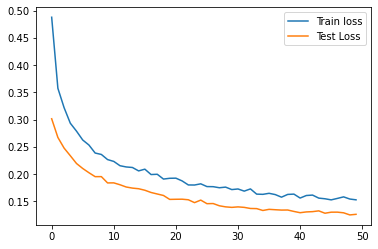

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

funcionó mucho mejor utilizando dropout

Ahora probaré con early stoping:

In [ ]:
# Sequential model, con early stoping
model = Sequential()
# primer capa oculta
model.add(Dense(22, # numero de neuronas
                input_dim = input_shape, 
                activation = 'relu'))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=50,
                    callbacks = [early_stopping])

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3660 - acc: 0.8539 - val_loss: 0.2653 - val_acc: 0.9050
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2367 - acc: 0.9053 - val_loss: 0.2167 - val_acc: 0.9148
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2044 - acc: 0.9168 - val_loss: 0.1964 - val_acc: 0.9218
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1874 - acc: 0.9222 - val_loss: 0.1838 - val_acc: 0.9254
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1749 - acc: 0.9287 - val_loss: 0.1752 - val_acc: 0.9294
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1672 - acc: 0.9312 - val_loss: 0.1682 - val_acc: 0.9326
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.1610 - acc: 0.9333 - val_loss: 0.1630 - val_acc: 0.9362
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.

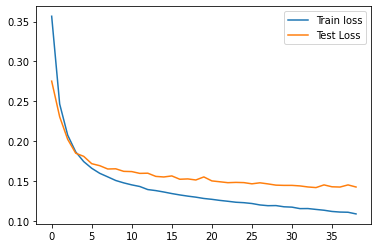

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

aplicando early stoping el modelo funciona bien con 40 epocas

---



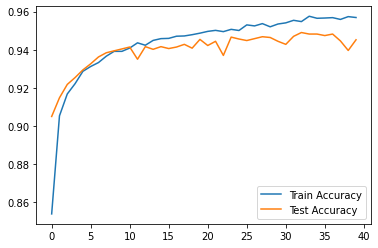

In [ ]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [ ]:
# evalua el modelo
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

469/469 [==============================] - 1s 2ms/step - loss: 0.0961 - acc: 0.9583

acc: 95.83%
157/157 [==============================] - 0s 1ms/step - loss: 0.1362 - acc: 0.9452

acc: 94.52%


5. Elije un modelo final y justifica tu decisión.

6. Explica por escrito en qué medida tu modelo resolverá el problema empresarial.

Elijo el modelo de redes neuronales ya que permite un mejor accuracy tanto en datos de entrenamiento como en datos de prueba.

El modelo ayuda a predecir la satisfacción de los clientes, esta información deberia usarse para mejorar los servicios peor calificados por los clientes.